# CAB420 Assignment 2 Random Forest

Paddy Welsh (n11070919)


In [4]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestRegressor


In [5]:
data = pandas.read_csv('shipping_data.csv')
data.head()

,weight (kg),length (m),width (m),height (m),shipment date,name,destination port,price ($)
0,1.10,0.40,0.39,0.26,19/03/2023,Camera Bag,Port of Singapore (Singapore),37.66
1,0.39,0.11,0.06,0.03,21/03/2023,Portable Bluetooth Keyboard,Port of Busan (South Korea),144.65
2,0.97,0.79,0.55,0.35,25/03/2023,Large Flat Rate Box,Port of Tianjin (China),38.57
3,6.22,0.36,0.37,0.02,15/03/2023,Ceramic Tiles,Port of Shanghai (China),10.34
4,1.18,17.77,0.27,0.13,25/03/2023,Garden Hose,Port of Tianjin (China),21.63


In [6]:
clean_data = data.dropna()
print(np.shape(data))
print(np.shape(clean_data))

(263821, 8)
(260961, 8)


In [7]:
# Preprocessing for Tokyo data only

data = clean_data
print(data.columns)
# Select all rows where the destination port is Tokyo.
data = data.loc[data['destination port'] == 'Port of Tokyo (Japan)']
# Get the shape of the data.
print(np.shape(data))
# Drop the destination port column
data = data.drop(columns=['destination port'])
print(data.columns)

Index(['weight (kg)', 'length (m)', 'width (m)', 'height (m)', 'shipment date',
       'name', 'destination port', 'price ($)'],
      dtype='object')
(52263, 8)
Index(['weight (kg)', 'length (m)', 'width (m)', 'height (m)', 'shipment date',
       'name', 'price ($)'],
      dtype='object')


In [8]:
# Preprocessing X and Y split and categorical variables

# Count how many unique values are there in shipment date column
print("Unique shipment dates:", len(data['shipment date'].unique()))
# Count how many unique values are there in name column
print("Unique names:", len(data['name'].unique()))

# Convert names into categorical variables.
data['name'] = data['name'].astype('category')
data['name'] = data['name'].cat.codes
# Convert shipment date into categorical variables.
data['shipment date'] = data['shipment date'].astype('category')
data['shipment date'] = data['shipment date'].cat.codes

X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
print(X)
print(Y)

Unique shipment dates: 17
Unique names: 291
        weight (kg)  length (m)  width (m)  height (m)  shipment date  name
14             3.63        0.41       0.30        0.26              8   153
15           216.25        0.62       0.60        0.70             12    12
16           368.33        1.12       0.92        1.38              5   171
22             1.88        0.64       0.49        0.08              7   281
24             0.91        0.12       0.34        0.18             14    74
...             ...         ...        ...         ...            ...   ...
263805         0.83        0.30       0.19        0.25              4   203
263811         1.26        0.30       0.21        0.16              5   264
263813         2.86        2.15       1.52        1.45              2     9
263817         1.20        0.42       0.29        0.34              3   208
263818       477.58        1.00       0.92        1.48              7   182

[52263 rows x 6 columns]
14        144.04
1

In [9]:
# Split into training, validation, and test data
train_samples = int(len(X)*0.6)
val_samples = int(len(X)*0.2)
X_train = X.iloc[:train_samples, :].to_numpy()
Y_train = Y.iloc[:train_samples].to_numpy()
X_val = X.iloc[train_samples:(train_samples + val_samples), :].to_numpy()
Y_val = Y.iloc[train_samples:(train_samples + val_samples)].to_numpy()
X_test = X.iloc[(train_samples + val_samples):, :].to_numpy()
Y_test = Y.iloc[(train_samples + val_samples):].to_numpy()

# Sanity checks
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)


(31357, 6)
(31357,)
(10452, 6)
(10452,)
(10454, 6)
(10454,)


### Linear Model

In [10]:
model = sm.OLS(Y_train, X_train)
trained_model = model.fit()

print(trained_model.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.076
Model:                            OLS   Adj. R-squared (uncentered):              0.076
Method:                 Least Squares   F-statistic:                              428.1
Date:                Mon, 05 Jun 2023   Prob (F-statistic):                        0.00
Time:                        11:15:42   Log-Likelihood:                     -3.8940e+05
No. Observations:               31357   AIC:                                  7.788e+05
Df Residuals:                   31351   BIC:                                  7.789e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Standardisation


Text(0.5, 1.0, 'Standardised X Train Data')

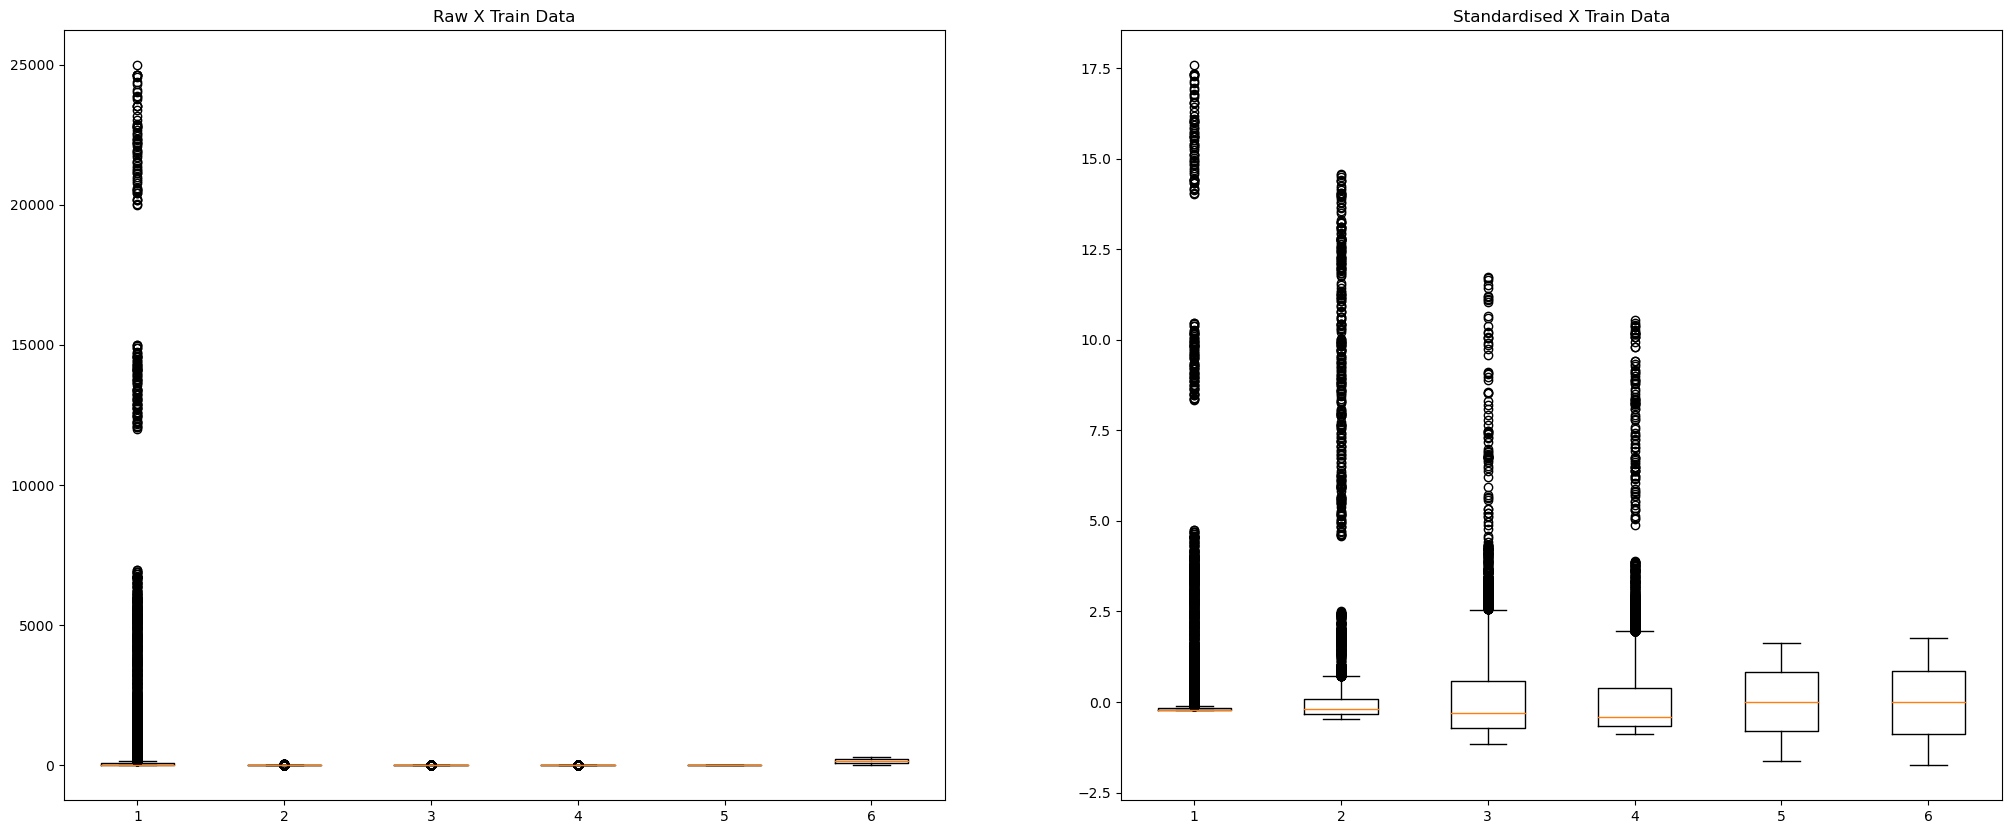

In [11]:
# Plot box plot for data 
fig = plt.figure(figsize=[25,10])
ax = fig.add_subplot(1,2,1)
ax.boxplot(X_train)
ax.set_title('Raw X Train Data')

# Standardise the data on training mean and sd.
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)
X_train = (X_train - mu) / sigma
X_val = (X_val - mu) / sigma
X_test = (X_test - mu) / sigma


# Plot box plot for standardised data
ax = fig.add_subplot(1,2,2)
ax.boxplot(X_train)
ax.set_title('Standardised X Train Data')

### Evaluation Function
(WOrk in progress)

In [12]:
def evaluate_random_forest_regressor(regressor, X_train, y_train, X_test, y_test):
    # Fit the Random Forest Regressor.
    regressor.fit(X_train, y_train)
    
    # Predict on training and test datasets.
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    
    # Plotting actual vs. predicted valuess.
    plt.scatter(y_train, y_train_pred, color='blue', label='Training data')
    plt.scatter(y_test, y_test_pred, color='red', label='Test data')
    plt.title('Actual vs. Predicted')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.show()
    
    # Important feture bar plot.
    feature_importance = regressor.feature_importances_
    sorted_indices = np.argsort(feature_importance)
    sorted_features = sorted_indices
    sorted_importance = feature_importance[sorted_indices]
    
    plt.barh(range(len(sorted_importance)), sorted_importance, tick_label=sorted_features)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.yticks(range(len(sorted_importance)), sorted_features)
    plt.show()

    # Residuals plot.
    plt.scatter(y_train_pred, y_train_pred - y_train, color='blue', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, color='red', label='Test data')
    plt.axhline(y=0, color='black', linewidth=2)
    plt.title('Residual Plot')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()


## Random Forest Regression

In [14]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees in the forest
    'max_depth': [None, 5, 10],     # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}

# Create the Random Forest regressor
regressor = RandomForestRegressor(random_state=0)

# Perform grid search
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

# Print the best hyperparameter values found
print("Best Hyperparameters:", grid_search.best_params_)




In [ ]:
# Evaluate the best model
best_regressor = grid_search.best_estimator_
evaluate_random_forest_regressor(best_regressor, X_train, Y_train, X_test, Y_test)

summary(best_regressor)